# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
ruta="C:\\Users\\azy51\\Downloads\\Ventas (1).csv"
df=pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [15]:
df["Fecha"]=pd.to_datetime(df["Fecha"])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [17]:
escala=MinMaxScaler(feature_range=(0,1))

In [19]:
escala

MinMaxScaler()

In [83]:
columnas_para_escalar=df.drop(["Ventas","Fecha"],axis=1).columns
normado=escala.fit_transform(df[columnas_para_escalar])
df_normado=pd.DataFrame(data=normado,columns=columnas_para_escalar)
df_normado.head()
X=df_normado
X
y=df["Ventas"]
X

,DíaDeLaSemana,Promociones,Festivo
0,0.833333,0.0,0.0
1,1.000000,0.0,1.0
2,0.000000,0.0,0.0
3,0.166667,1.0,0.0
4,0.333333,0.0,0.0
...,...,...,...
360,0.166667,1.0,0.0
361,0.333333,0.0,0.0
362,0.500000,0.0,0.0
363,0.666667,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [29]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


Text(0, 0.5, 'Frecuencia')

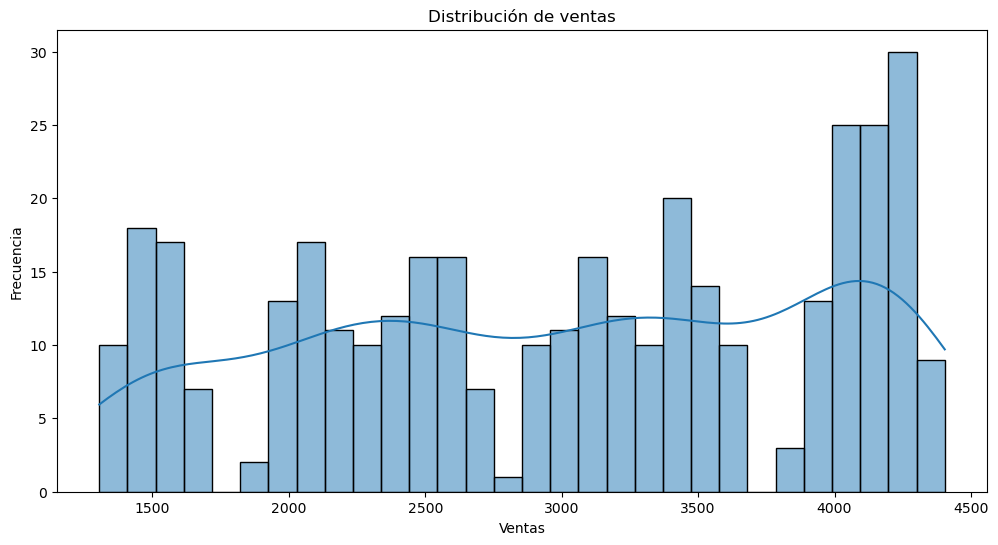

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df["Ventas"],bins=30,kde=True)
plt.title("Distribución de ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")

In [37]:
modelos=[
    ("modelo lineal",LinearRegression()),
    ("modelo arbol",DecisionTreeRegressor(random_state=42)),
    ("modelo forest",RandomForestRegressor(random_state=42))
]

In [53]:
X_train,X_probe,y_train,y_probe=train_test_split(X,y,train_size=0.7,random_state=42)

In [55]:
for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    score=modelo.score(X_probe,y_probe)
    print(f"{nombre}:{score}")

modelo lineal:0.9901259345323099
modelo arbol:0.9900902545523982
modelo forest:0.9899976100408657


In [81]:
modelo_lineal=LinearRegression()
modelo_lineal.fit(X_train,y_train)
predicciones_lineal=modelo_lineal.predict(X_probe)
predicciones_lineal

array([2508.32510401, 3001.75286548, 4206.13157895, 4206.13157895,
       4206.13157895, 4206.13157895, 3495.18062696, 3988.60838844,
       3191.31111111, 3988.60838844, 1521.46958105, 2508.32510401,
       2204.45558815, 3495.18062696, 2508.32510401, 3495.18062696,
       3988.60838844, 1521.46958105, 4178.16663407, 2014.89734253,
       1521.46958105, 2508.32510401, 1521.46958105, 4206.13157895,
       2204.45558815, 3495.18062696, 2204.45558815, 3191.31111111,
       3495.18062696, 2508.32510401, 2508.32510401, 2014.89734253,
       3988.60838844, 1521.46958105, 4178.16663407, 1521.46958105,
       4178.16663407, 4206.13157895, 3495.18062696, 1521.46958105,
       2508.32510401, 1521.46958105, 1521.46958105, 2204.45558815,
       2508.32510401, 2204.45558815, 3495.18062696, 3988.60838844,
       3191.31111111, 2014.89734253, 1521.46958105, 2204.45558815,
       2014.89734253, 2204.45558815, 4206.13157895, 4206.13157895,
       1521.46958105, 2204.45558815, 1521.46958105, 3988.60838

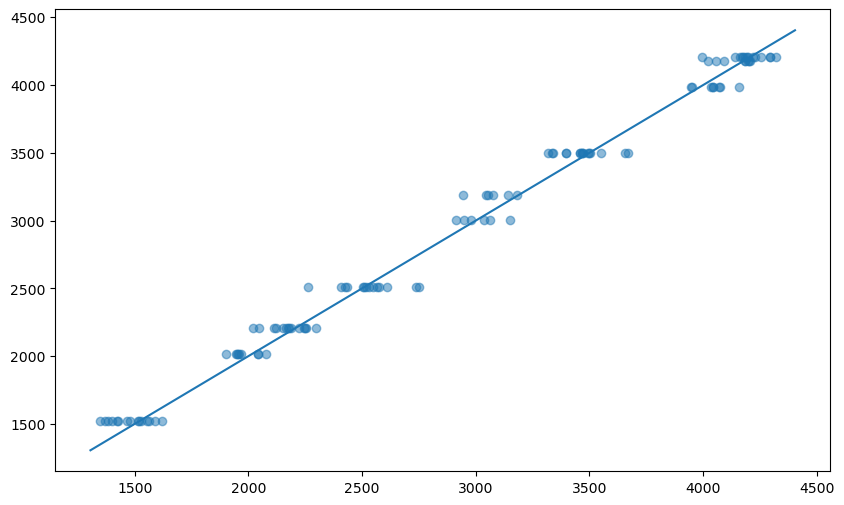

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(y_probe,predicciones_lineal,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()])

In [71]:
df_test=pd.DataFrame({"Real":y_probe,"Predicho":predicciones_lineal})
df_test=df_test.sort_index()

Text(0.5, 1.0, 'Comparación de ventas reales vs ventas predichas')

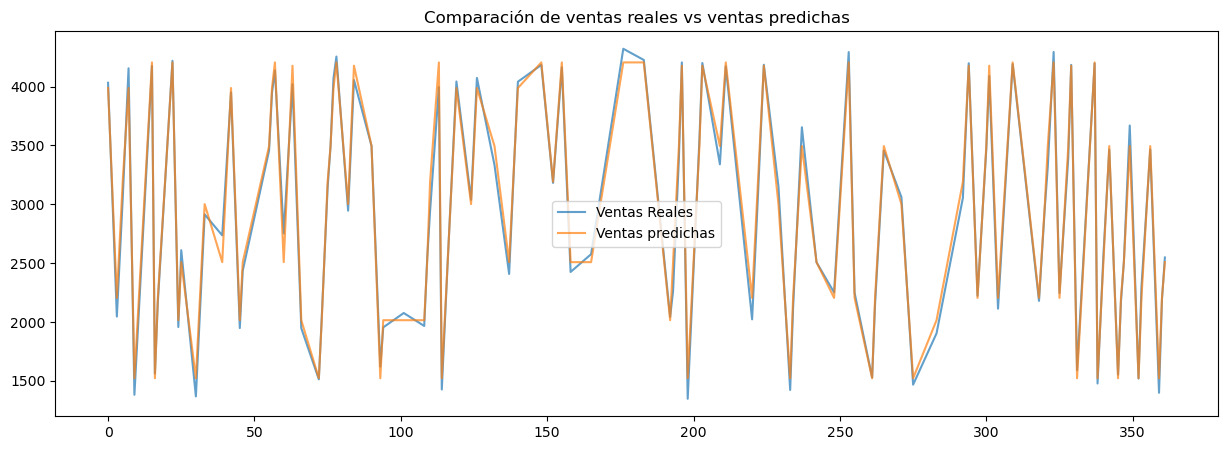

In [79]:
plt.figure(figsize=(15,5))
plt.plot(df_test["Real"],label="Ventas Reales",alpha=0.7)
plt.plot(df_test["Predicho"],label="Ventas predichas",alpha=0.7)
plt.legend()
plt.title("Comparación de ventas reales vs ventas predichas")